In [1]:
# Import libraries
import pandas as pd

In [2]:
# Get data
file_name = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/adult.data'
census = pd.read_csv(file_name)
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Create dataframe with modified columnames
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
            'marital_status', 'occupation', 'relationship', 'race', 'sex',
            'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

census = pd.DataFrame(census.values, columns = col_names)
census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Basic stats
print(f'Dataframe shape: {census.shape}')
print(f'Missing Values:\n {census.isnull().values.sum()}')
print(f'Unique Values:\n{census.nunique()}')

Dataframe shape: (32560, 15)
Missing Values:
 0
Unique Values:
age                  73
workclass             9
fnlwgt            21647
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64


In [5]:
# Infer objects
census.info()
census = census.infer_objects()
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null object
workclass         32560 non-null object
fnlwgt            32560 non-null object
education         32560 non-null object
education_num     32560 non-null object
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null object
capital_loss      32560 non-null object
hours_per_week    32560 non-null object
native_country    32560 non-null object
income            32560 non-null object
dtypes: object(15)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560

In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Explore Income
census['income'] = census['income'].str.strip()
n = census.shape[0]
n_greater_50k = census.loc[census['income'] == '>50K'].shape[0]
n_less_equal_50k = census.loc[census['income'] == '<=50K'].shape[0]
greater_percent = (n_greater_50k / n) * 100

print(f'Total number of records: {n}')
print(f'Making more than 50K: {n_greater_50k}')
print(f'Making less or equal to 50K: {n_less_equal_50k}')
print(f'Percentage making more than 50K: {round(greater_percent, 2)}')

Total number of records: 32560
Making more than 50K: 7841
Making less or equal to 50K: 24719
Percentage making more than 50K: 24.08


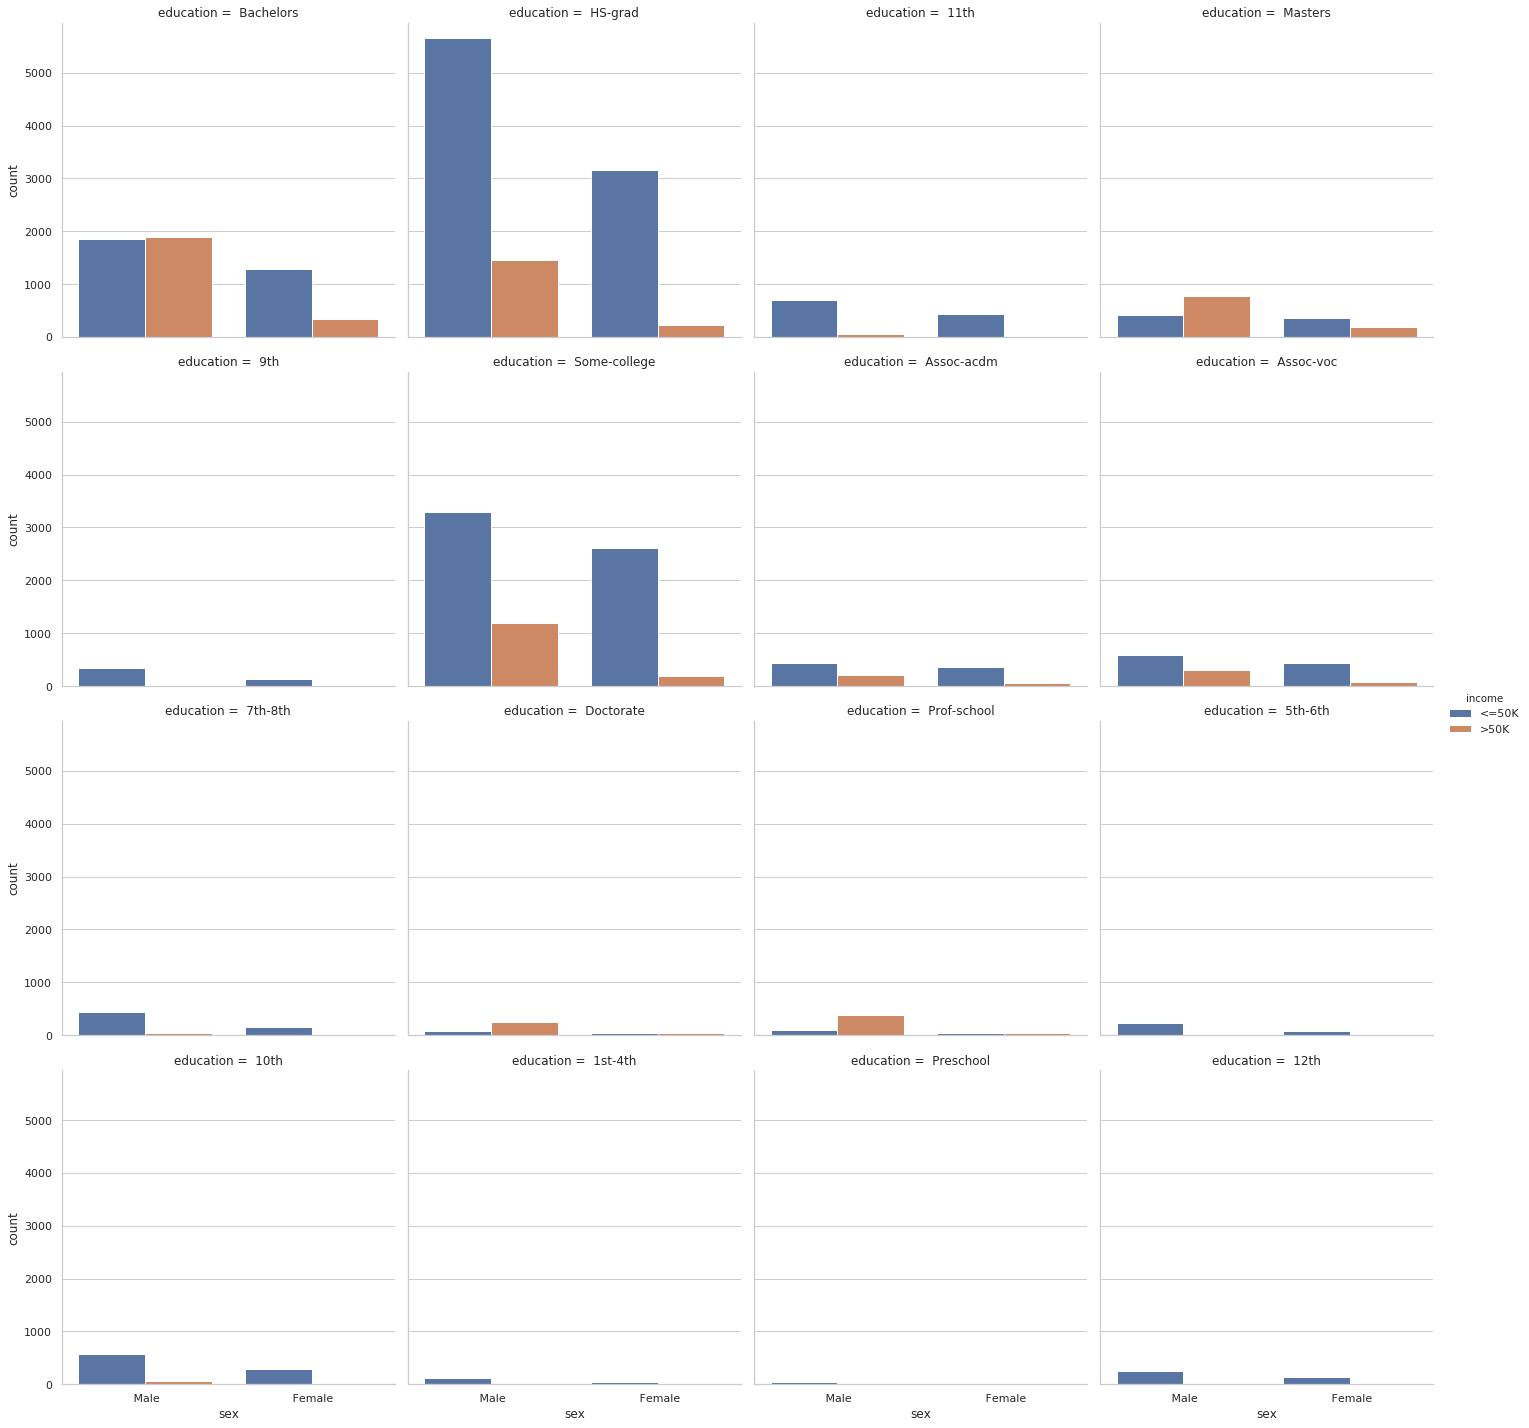

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', color_codes=True)
sns.catplot('sex', col='education', data=census, hue='income', kind='count', col_wrap=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e04374e0>]],
      dtype=object)

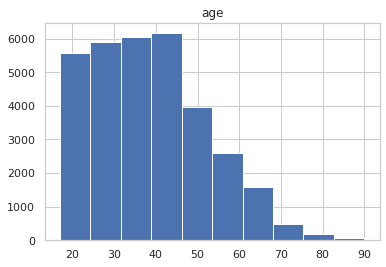

In [9]:
# Age histogram
census.hist('age')

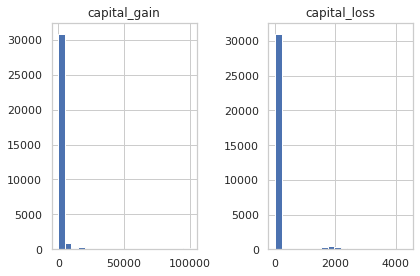

In [10]:
# Capital gain loss histogram comparisons
import numpy as np

fig, axes = plt.subplots(1, 2)
census.hist('capital_gain', bins=20, ax=axes[0])
census.hist('capital_loss', bins=20, ax=axes[1])
plt.tight_layout()

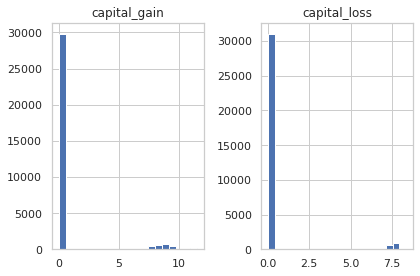

In [11]:
# Apply log to capital gains losses
skewed = ['capital_gain', 'capital_loss']
census[skewed] = census[skewed].apply(lambda x: np.log(x + 1))

fig, axes = plt.subplots(1, 2)
census.hist('capital_gain', bins=20, ax=axes[0])
census.hist('capital_loss', bins=20, ax=axes[1])
plt.tight_layout()

In [12]:
census.isin([' ?']).any(axis='rows')

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
income            False
dtype: bool

In [13]:
census = census[census['workclass'] != ' ?']
census = census[census['occupation'] != ' ?']
census = census[census['native_country'] != ' ?']

In [14]:
# Prepare data for modelling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
census_minmax = pd.DataFrame(data=census)
census_minmax[numerical] = scaler.fit_transform(census_minmax[numerical])
census_minmax.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,<=50K
1,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,<=50K
2,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,<=50K
3,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,284582,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,<=50K


In [15]:
# Set income as target and label 1 and 0 for <=50K
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
income = census_minmax['income'].apply(lambda x: 0 if x == '<=50K' else 1)
target = pd.Series(encoder.fit_transform(income))

In [16]:
# Set features
features = pd.get_dummies(census_minmax.drop('income', axis=1))
features_list = list(features.columns)
print(f'{len(features_list)} total features after get dummies')

104 total features after get dummies


In [17]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (20207, 104)
X_test shape: (9954, 104)


In [18]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
    - learner: the learning algorithm
    - sample_size: training set sample size
    - X_train: training features
    - y_train: training targets
    - X_test: testing features
    - y_test: testing targets
    '''
    
    results = {}
    # Fit the training data
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['training_time'] = end - start
    
    # Get predictions
    start = time()
    preds_train = learner.predict(X_train[:300])
    preds_test = learner.predict(X_test)
    end = time()
    results['prediction_time'] = end - start
    
    results['training_accuracy'] = accuracy_score(y_train[:300], preds_train)
    results['testing_accuracy'] = accuracy_score(y_test, preds_test)
    results['training_fscore'] = fbeta_score(y_train[:300], preds_train, 0.5)
    results['testing_fscore'] = fbeta_score(y_test, preds_test, 0.5)
    
    # Print algorithm used and sample size
    print(f'{learner.__class__.__name__} trained on {sample_size} samples') 
    
    return results

In [19]:
# Compare DecisionTree, SVC, and AdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

tree_clf = DecisionTreeClassifier()
svc_clf = SVC(gamma='auto')
adaboost_clf = AdaBoostClassifier()

# Set sample sizes for 1%, 10%, and 100%
one_percent = int(round(len(X_train) / 100))
ten_percent = int(round(len(X_train) / 10))
hundred_percent = int(round(len(X_train)))

# Get results
results = {}
for clf in [tree_clf, svc_clf, adaboost_clf]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([one_percent, ten_percent, hundred_percent]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        

DecisionTreeClassifier trained on 202 samples
DecisionTreeClassifier trained on 2021 samples
DecisionTreeClassifier trained on 20207 samples
SVC trained on 202 samples
SVC trained on 2021 samples
SVC trained on 20207 samples
AdaBoostClassifier trained on 202 samples
AdaBoostClassifier trained on 2021 samples
AdaBoostClassifier trained on 20207 samples


In [20]:
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
training_time,0.002982,0.013061,0.178020
prediction_time,0.006228,0.005761,0.006910
training_accuracy,0.916667,1.000000,1.000000
testing_accuracy,0.764517,0.800482,0.814145
training_fscore,0.825359,1.000000,1.000000
testing_fscore,0.521513,0.596643,0.624900


SVC


,1%,10%,100%
training_time,0.006963,0.451302,134.150638
prediction_time,0.216252,2.096432,21.156849
training_accuracy,0.926667,0.950000,0.886667
testing_accuracy,0.750753,0.744424,0.734579
training_fscore,0.927152,0.954545,0.845324
testing_fscore,0.044150,0.161506,0.322704


AdaBoostClassifier


,1%,10%,100%
training_time,0.074498,0.159454,1.207389
prediction_time,0.161464,0.161568,0.163067
training_accuracy,0.926667,0.896667,0.863333
testing_accuracy,0.791340,0.844886,0.853727
training_fscore,0.837209,0.828402,0.748588
testing_fscore,0.578617,0.701116,0.717789


<Figure size 432x288 with 0 Axes>

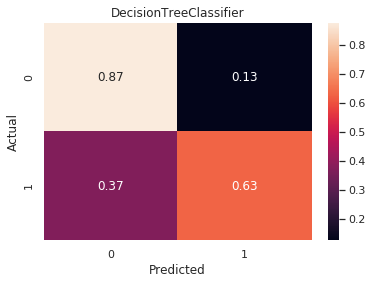

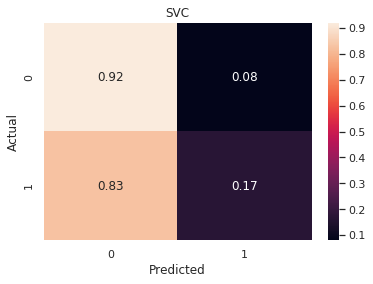

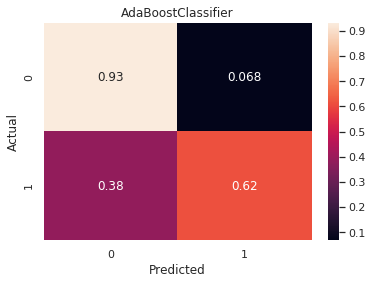

In [21]:
# Compare confusion matrix models
from sklearn.metrics import confusion_matrix

plt.figure()
for i, clf in enumerate([tree_clf, svc_clf, adaboost_clf]):
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(i)
    sns.heatmap(cm, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(clf.__class__.__name__)
    plt.show()

In [22]:
# Optimize AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Provide hyperparameters
h_params = {'n_estimators':[50,120],
           'learning_rate':[0.1,0.5,1.],
           'base_estimator__min_samples_split':np.arange(2,8,2),
           'base_estimator__max_depth':np.arange(1,4,1)}

scorer = make_scorer(fbeta_score,beta=0.5)
grid_obj = GridSearchCV(clf, h_params, scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print('Unoptimized model\n-----------------')
print(f'Accuracy: {accuracy_score(y_test, predictions):.4f}')
print(f'F-score: {fbeta_score(y_test, predictions, 0.5):.4f}')
print('\nOptimized model\n---------------')
print(f'Accuracy: {accuracy_score(y_test, best_predictions):.4f}')
print(f'F-score: {fbeta_score(y_test, best_predictions, 0.5):.4f}')
print('\nModel\n-----')
print(best_clf)

Unoptimized model
-----------------
Accuracy: 0.8141
F-score: 0.6249

Optimized model
---------------
Accuracy: 0.8679
F-score: 0.7500

Model
-----
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                            